In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from fftcwt.fftcwt import fftcwt
from v97cwt.v97cwt import v97cwt
from m02cwt.m02cwt import m02cwt
from a19cwt.a19cwt import a19cwt
from matplotlib import rc
from matplotlib.ticker import Locator
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
plt.style.use('classic')
%matplotlib inline

- Take ``fftcwt`` as an example and print information about it. The output docstring tells us that ``fftcwt`` contains two functions, ``rfftcwt_periodbc`` and ``cfftcwt_periodbc``. The former function returns ``scales`` and ``cwt``, whereas the latter returns ``scales``, ``realcwt``, and ``imagcwt``. Following the same way, you can output information about other modules.

In [2]:
print(fftcwt.__doc__)

scales : 'd'-array(-1), not allocated 
cwt : 'd'-array(-1,-1), not allocated 
realcwt : 'd'-array(-1,-1), not allocated 
imagcwt : 'd'-array(-1,-1), not allocated 
rfftcwt_periodbc(signal,lbox,nsubs,wavelet_name,[nmesh])

Wrapper for ``rfftcwt_periodbc``.

Parameters
----------
signal : input rank-1 array('d') with bounds (nmesh)
lbox : input float
nsubs : input int
wavelet_name : input string(len=-1)

Other Parameters
----------------
nmesh : input int, optional
    Default: len(signal)
cfftcwt_periodbc(signal,lbox,nsubs,wavelet_name,[nmesh])

Wrapper for ``cfftcwt_periodbc``.

Parameters
----------
signal : input rank-1 array('d') with bounds (nmesh)
lbox : input float
nsubs : input int
wavelet_name : input string(len=-1)

Other Parameters
----------------
nmesh : input int, optional
    Default: len(signal)



- By using ``fftcwt`` module with the wavelet ``cwgdw``, We perform the CWT of periodic signals $\delta(x)$, which are described in Sec 5 of [Wang & He 2023](https://ui.adsabs.harvard.edu/abs/2023arXiv230203909W/abstract).

In [3]:
# Load data
path = "F:\\Works\\20220617_Work\\20230202_cosmo_apps\\"
delta1   = np.loadtxt(path+"dens_field_1d\\delta_1.dat", dtype=np.float64)
delta100 = np.loadtxt(path+"dens_field_1d\\delta_100.dat", dtype=np.float64)

# Perform the CWT
Lbox    = 1.0     # Spatial length of the signal
Nsubs   = 12      # Number of sub-levels of scales
wavelet = "cwgdw" # Name of the wavelet that we used

fftcwt.rfftcwt_periodbc( signal=delta1, lbox=Lbox, nsubs=Nsubs, wavelet_name=wavelet )
scales        = np.copy(fftcwt.scales)  # Save scales
cwt1          = np.copy(fftcwt.cwt)     # Save cwt
fftcwt.scales = None                   # deallocate array
fftcwt.cwt    = None                   # deallocate array

fftcwt.rfftcwt_periodbc( signal=delta100, lbox=Lbox, nsubs=Nsubs, wavelet_name=wavelet )
cwt100        = np.copy(fftcwt.cwt)    # Save cwt
fftcwt.scales = None                  # deallocate array
fftcwt.cwt    = None                  # deallocate array

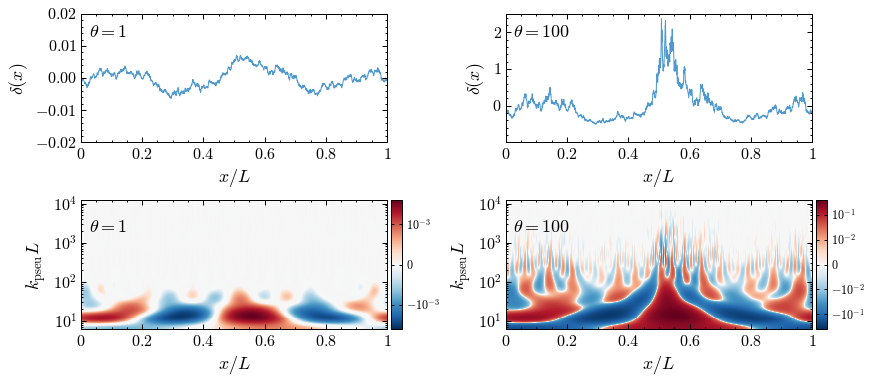

In [4]:
cw_cwgdw = 0.428218886729052
x        = (1.0/4096)*np.linspace(0,4095,4096)
deltas   = [delta1, delta100]
cwts     = [cwt1, cwt100]
xx, kk   = np.meshgrid(x, scales/cw_cwgdw)

fig, axes = plt.subplots(ncols=2, nrows=2,figsize=(12,5.2),constrained_layout=True)
for row in range(2):
    for col in range(2):
        ax = axes[row, col]
        for axis in ['top', 'bottom', 'left', 'right']:
            ax.spines[axis].set_linewidth(1.0)
        if (row==0):
            ax.plot(x, deltas[col], linewidth=1.0, color="#4f99cf")
            ax.xaxis.set_minor_locator(AutoMinorLocator())
            ax.yaxis.set_minor_locator(AutoMinorLocator())
            ax.set_ylabel(r"$\delta(x)$", fontsize=18)
            if (col==0):
                ax.text(0.025, 0.013, r"$\theta=1$", fontsize=18)
                ax.set_yticks([-0.02, -0.01, 0, 0.01, 0.02])
                ax.set_yticklabels([r"$-0.02$", r"$-0.01$", r"$0.00$", r"$0.01$", r"$0.02$"])
            elif (col==1):
                ax.text(0.025, 1.9, r"$\theta=100$", fontsize=18)
                ax.set_yticks([0, 1,2])
                ax.set_yticklabels([r"$0$", r"$1$", r"$2$"])
        elif (row==1):
            vmin = np.amin(cwts[col])
            vmax = np.amax(cwts[col])
            if (col==0):
                norm = mpl.colors.SymLogNorm(linthresh=0.0002, linscale=0.0002,vmin=-vmax, vmax=vmax, base=10)
            elif (col==1):
                norm = mpl.colors.SymLogNorm(linthresh=0.001, linscale=0.001,vmin=-vmax, vmax=vmax, base=10)
            im = ax.pcolormesh(xx, kk, cwts[col], cmap="RdBu_r", shading="auto",norm=norm)
            cb = fig.colorbar(im, ax=ax, pad=-0.00001, shrink=1, aspect=12)
            cb.ax.tick_params(width=1, length=3, which="major", left=True, right=True, labelsize=12)
            if (col==0):
                ax.text(0.025, 2000, r"$\theta=1$", fontsize=18)
                cb.set_ticks([-0.001, 0.0, 0.001])
                cb.set_ticklabels([r"$-10^{-3}$",r"$0$", r"$10^{-3}$"])
            elif (col==1):
                ax.text(0.025, 2000, r"$\theta=100$", fontsize=18)
                cb.set_ticks([-0.1, -0.01, 0.0, 0.01, 0.1])
                cb.set_ticklabels([r"$-10^{-1}$",r"$-10^{-2}$",r"$0$", r"$10^{-2}$", r"$10^{-1}$"])
            ax.set_xlim(0,1)
            ax.set_ylim(2*np.pi,scales[-1]/cw_cwgdw)
            ax.set_yscale("log")
            ax.set_ylabel(r"$k_\mathrm{pseu}L$", fontsize=18)
            ax.set_yticks([10, 100, 1000, 10000])
            ax.set_yticklabels([r"$10^{1}$",r"$10^{2}$", r"$10^{3}$", r"$10^{4}$"])
            ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.set_xlabel(r"$x/L$", fontsize=18)
        ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
        ax.set_xticklabels([r"$0$", r"$0.2$", r"$0.4$", r"$0.6$", r"$0.8$", r"$1$"])
        ax.tick_params(width=1.0, length=5, axis='both',
               which='major', direction="in", labelsize=16)
        ax.tick_params(width=1.0, length=2, axis='both',
               direction="in", which='minor')